In [175]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats
import pandas as pd
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'results'))
OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), 'figures'))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [176]:
# Adapted from https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
sns.set(font='Helvetica',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': True,
 'axes.axisbelow': True,
 'grid.color': 'lightgrey',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":16,
                                "axes.labelsize":13})

## New data

In [136]:
MPI_BASE_BATH = os.path.join(BASE_PATH, os.pardir, 'mpi', 'new_res')
SMI_BASE_BATH = os.path.join(BASE_PATH, os.pardir, 'fmi_vms', 'new_res')
NUM_NODES = [2, 4, 8, 16, 32]
experiments = ['allreduce', 'bcast', 'gather', 'reduce', 'scan', 'scatter']

In [127]:
mpi_data = []

for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            mpi_path = os.path.join(MPI_BASE_BATH, f"{experiment}_{num_node}_{rank}.out")
            
            data = pd.read_csv(mpi_path, names=['start', 'end', 'duration'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['index'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        mpi_data.append(max_data)
        
mpi_data = pd.concat(mpi_data)
mpi_data["method"] = "Open MPI"

fmi_data = []

for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            fmi_path = os.path.join(SMI_BASE_BATH, f"{experiment}_{num_node}_{rank}.out")
            
            data = pd.read_csv(fmi_path, names=['start', 'end', 'duration'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['index'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        ##print(max_data)
        #print(max_data.min())
        #print(max_data.mean())
        #print(max_data.median())
        #print(max_data.quantile(.95))
        #print(max_data.quantile(.99))
        #print(max_data.max())
        fmi_data.append(max_data)
        
fmi_data = pd.concat(fmi_data)
fmi_data["method"] = "FMI"
mpi_data = pd.concat([fmi_data, mpi_data])
#print(mpi_data)
#display(vals["allreduce"].groupby(['n', 'method']).max())
#display(vals["bcast"].groupby(['n', 'method']).max())
#display(vals["gather"].groupby(['n', 'method']).max())
#display(vals["reduce"].groupby(['n', 'method']).max())
#display(vals["scan"].groupby(['n', 'method']).max())
#display(vals["scatter"].groupby(['n', 'method']).max())
#mpi_bench = vals

FileNotFoundError: [Errno 2] No such file or directory: '/work/serverless/2022/collectives/serverless-collectives-artifact/results/../fmi_vms/new_res/allreduce_2_0.out'

Text(2, 3750, '1235.5')

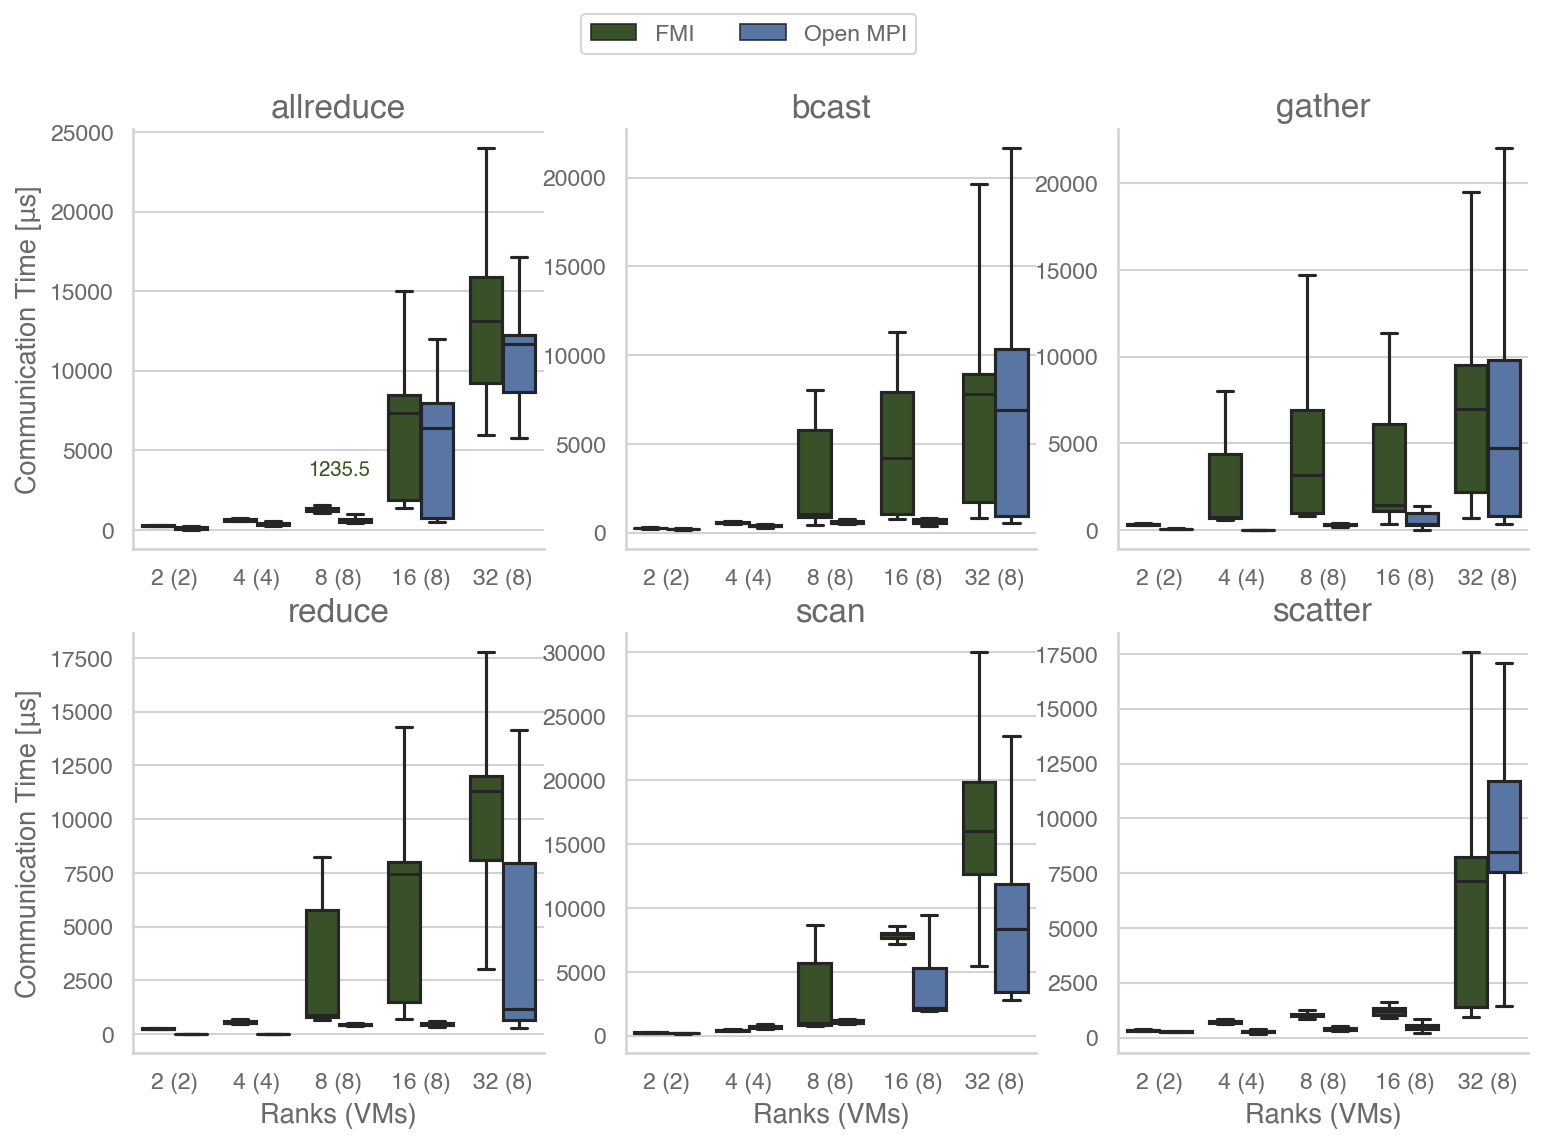

In [108]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
my_pal = {"Open MPI": "b", "FMI": "#385723"}
#axs[0,0].set_ylim(0,4000)
axs[0,0].set_title("allreduce")
#axs[0,1].set_ylim(0,4000)
axs[0,1].set_title("bcast")
#axs[0,2].set_ylim(0,4000)
axs[0,2].set_title("gather")
#axs[1,0].set_ylim(0,4000)
axs[1,0].set_title("reduce")
#axs[1,1].set_ylim(0,4000)
axs[1,1].set_title("scan")
#axs[1,2].set_ylim(0,4000)
axs[1,2].set_title("scatter")

sns.boxplot(x="ranks", y="duration", hue="method",
            data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], palette=my_pal,showfliers=False)
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], cut=0,palette=my_pal, scale="count")
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "bcast"], ax=axs[0, 1], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "gather"], ax=axs[0, 2],palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "reduce"], ax=axs[1, 0], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scan"], ax=axs[1, 1], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scatter"], ax=axs[1, 2],  palette=my_pal,showfliers=False)


#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], palette=my_pal, scale="width")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "bcast"], ax=axs[0, 1], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "gather"], ax=axs[0, 2], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "reduce"], ax=axs[1, 0], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "scan"], ax=axs[1, 1], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "scatter"], ax=axs[1, 2], cut=0, palette=my_pal, scale="count")


for ix,iy in np.ndindex(axs.shape):
    axs[ix,iy].set_xticklabels(["2 (2)", "4 (4)", "8 (8)", "16 (8)", "32 (8)"])
    if ix == 0 and iy == 1:
        axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.3, 1.3), ncol=2, fancybox=True)
    else:
        axs[ix,iy].legend([],[], frameon=False)
    if ix == 1:
        axs[ix,iy].set_xlabel("Ranks (VMs)")
    else:
        axs[ix,iy].set_xlabel(None)
    if iy == 0:
        axs[ix,iy].set_ylabel("Communication Time [μs]")
    else:
        axs[ix,iy].set_ylabel(None)

axs[0,0].text(2, 3750, va='center', ha='center', size='x-small',
      backgroundcolor="white", color=my_pal["FMI"],
      s=data.loc[(data['experiment'] == "allreduce") & (data["ranks"] == 8) & (data["method"] == "FMI")]["duration"].median())

#axs[0,0].text(2, 3750, va='center', ha='center', size='x-small',
#              backgroundcolor="white", color=my_pal["FMI"],
#              s=data.loc[(data['experiment'] == "allreduce") & (data["ranks"] == 8) & (data["method"] == "FMI")]["duration"].max())
#axs[0,0].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["allreduce"][(vals["allreduce"]["n"] == 16) & (vals["allreduce"]["method"] == "FMI")]["latency"].max())
#axs[0,0].text(4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["allreduce"][(vals["allreduce"]["n"] == 32) & (vals["allreduce"]["method"] == "FMI")]["latency"].max())

#axs[0,1].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["bcast"][(vals["bcast"]["n"] == 32) & (vals["bcast"]["method"] == "FMI")]["latency"].max())
#axs[0,1].text(2, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["bcast"][(vals["bcast"]["n"] == 8) & (vals["bcast"]["method"] == "Open MPI")]["latency"].max())
#axs[0,1].text(3.7, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["bcast"][(vals["bcast"]["n"] == 32) & (vals["bcast"]["method"] == "Open MPI")]["latency"].max())

#axs[0,2].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["gather"][(vals["gather"]["n"] == 16) & (vals["gather"]["method"] == "FMI")]["latency"].max())
#axs[0,2].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["gather"][(vals["gather"]["n"] == 32) & (vals["gather"]["method"] == "FMI")]["latency"].max())
#axs[0,2].text(3.7, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["gather"][(vals["gather"]["n"] == 32) & (vals["gather"]["method"] == "Open MPI")]["latency"].max())

#axs[1,0].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["reduce"][(vals["reduce"]["n"] == 16) & (vals["reduce"]["method"] == "Open MPI")]["latency"].max())
#axs[1,0].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["reduce"][(vals["reduce"]["n"] == 32) & (vals["reduce"]["method"] == "FMI")]["latency"].max())

#axs[1,1].text(2.7, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["scan"][(vals["scan"]["n"] == 16) & (vals["scan"]["method"] == "Open MPI")]["latency"].max())
#axs[1,1].text(3.6, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["scan"][(vals["scan"]["n"] == 32) & (vals["scan"]["method"] == "Open MPI")]["latency"].max())
#axs[1,1].text(2, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["scan"][(vals["scan"]["n"] == 8) & (vals["scan"]["method"] == "FMI")]["latency"].max())
#axs[1,1].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["scan"][(vals["scan"]["n"] == 32) & (vals["scan"]["method"] == "FMI")]["latency"].max())

#axs[1,2].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["scatter"][(vals["scatter"]["n"] == 16) & (vals["scatter"]["method"] == "FMI")]["latency"].max())

#fig.savefig(os.path.join(OUTPUT_PATH, "fmi_benchmark_mpi_new.pdf"), bbox_inches='tight')


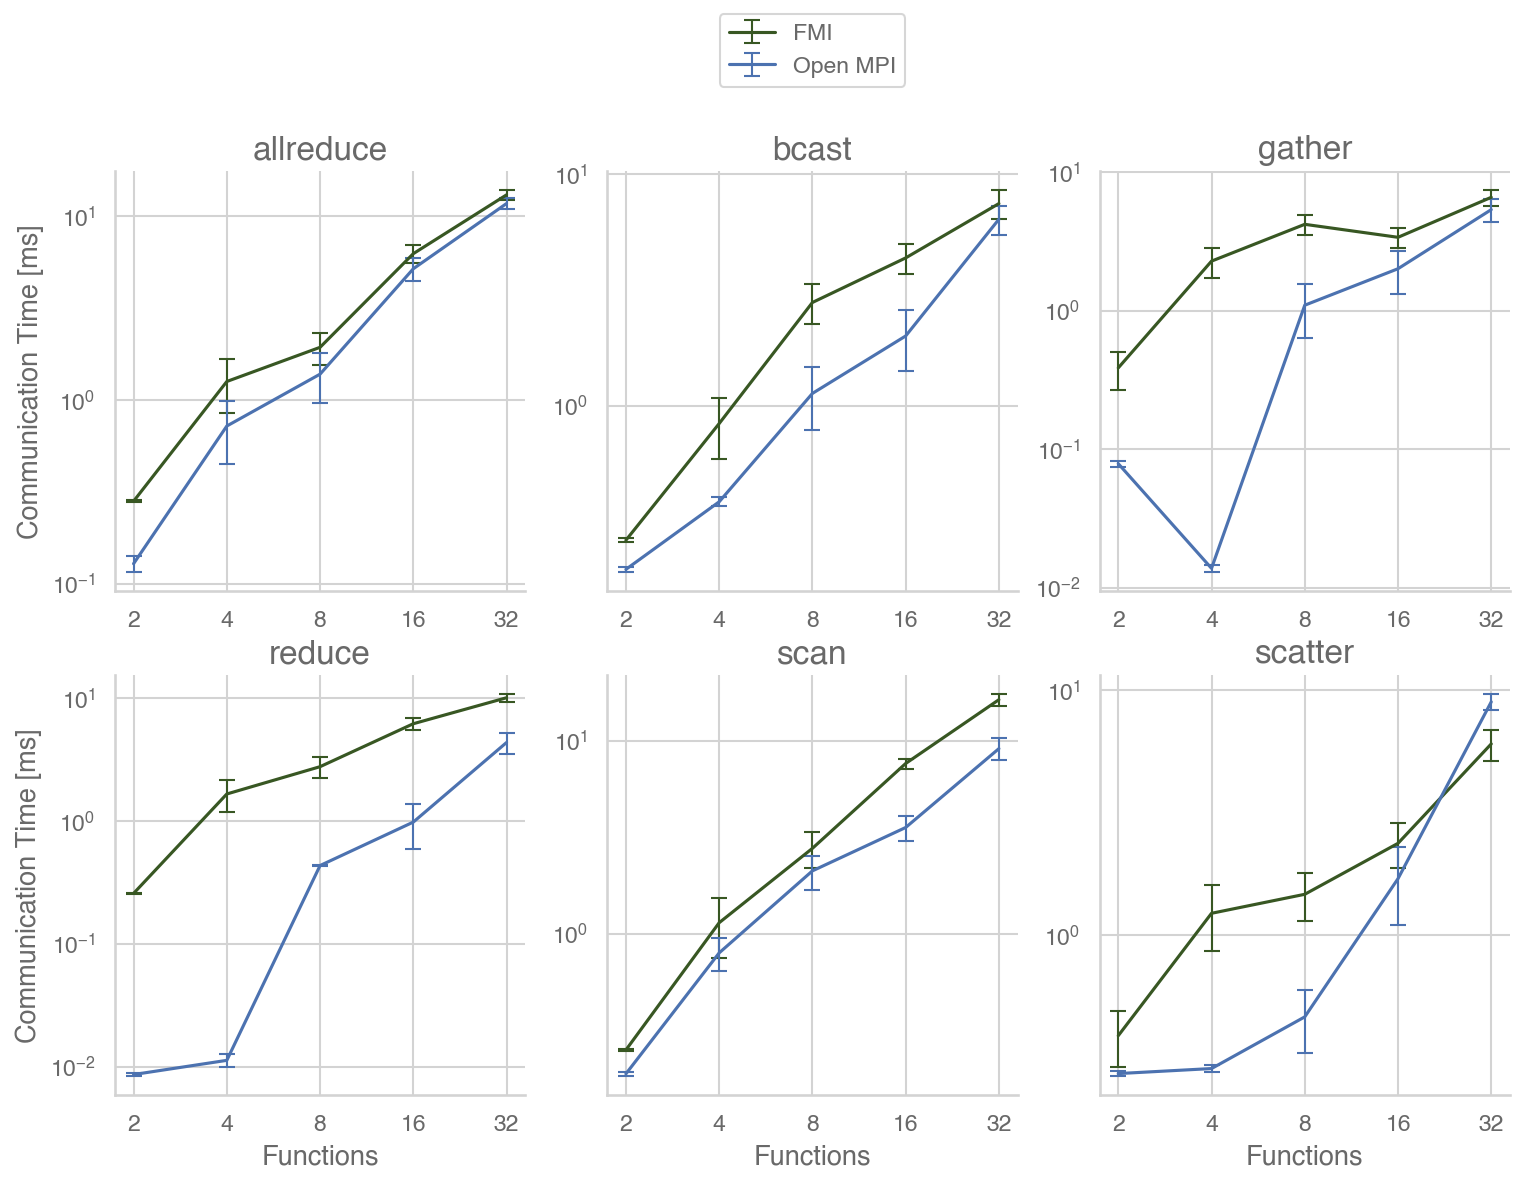

In [115]:
NUM_NODES = [2, 4, 8, 16, 32]
vals = {}
#for experiment in experiments:
#    vals[experiment] = pd.concat([mpi_bench[experiment][(mpi_bench[experiment]["method"] == "FMI") | (mpi_bench[experiment]["method"] == "Open MPI")], lambda_bench[experiment][lambda_bench[experiment]["method"] == "Direct"]])
#    vals[experiment]["method"] = vals[experiment]["method"].replace({"FMI": "EC2 VMs (FMI Direct)", "Open MPI": "EC2 VMs (Open MPI)", "Direct": "Lambda Functions (FMI Direct)"})
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#my_pal = {
#    "EC2 VMs (FMI Direct)": "#385723", 
#    "Lambda Functions (FMI Direct)": "#98a68f", 
#    "EC2 VMs (Open MPI)": "b"
#}
my_pal = {
    "FMI": "#385723", 
    "Lambda Functions (FMI Direct)": "#98a68f", 
    "Open MPI": "b"
}
#for method in ["EC2 VMs (FMI Direct)", "Lambda Functions (FMI Direct)", "EC2 VMs (Open MPI)"]:
for method in ["FMI", "Open MPI"]:
    ix, iy = 0, 0
    for experiment in experiments:
        plot_data = {}
        error = []
        preds = {}
        for num_node in NUM_NODES:
            experiment_sizes = {
                "allreduce": 4,
                "bcast": 4,
                "gather": 4992 / num_node,
                "reduce": 4,
                "scan": 4,
                "scatter": 4992 / num_node
            }
            #values = vals[experiment].loc[(vals[experiment]['n'] == num_node) & (vals[experiment]['method'] == method)]['latency']
            values = data.loc[(data['experiment'] == experiment) & (data['ranks'] == num_node) & (data['method'] == method)]['duration']
            mean = np.mean(values)
            #mean = np.median(values)
            ci = scipy.stats.sem(values) * scipy.stats.t.ppf((1 + 0.95) / 2., len(values) - 1)
            plot_data[num_node] = mean / 1000
            #print(mean, ci)
            error.append(ci / 1000)
            
            
        axs[ix,iy].errorbar(plot_data.keys(), plot_data.values(), error, elinewidth=1, capsize=4, label=method, c=my_pal[method])
        axs[ix,iy].set_title(experiment)
        axs[ix,iy].set_yscale('log')
        axs[ix,iy].set_xscale('log')
        axs[ix,iy].set_xticks(NUM_NODES)
        axs[ix,iy].set_xticklabels(NUM_NODES)
        if ix == 0 and iy == 1:
            axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), fancybox=True)
        else:
            axs[ix,iy].legend([],[], frameon=False)
        if ix == 1:
            axs[ix,iy].set_xlabel("Functions")
        else:
            axs[ix,iy].set_xlabel(None)
        if iy == 0:
            axs[ix,iy].set_ylabel("Communication Time [ms]")
        else:
            axs[ix,iy].set_ylabel(None)
        iy += 1
        if iy > 2:
            iy = 0
            ix = 1
#fig.savefig(os.path.join(OUTPUT_PATH, "fmi_mpi_lambda_benchmark_comparison.pdf"), bbox_inches='tight')

Text(2, 3750, '14638')

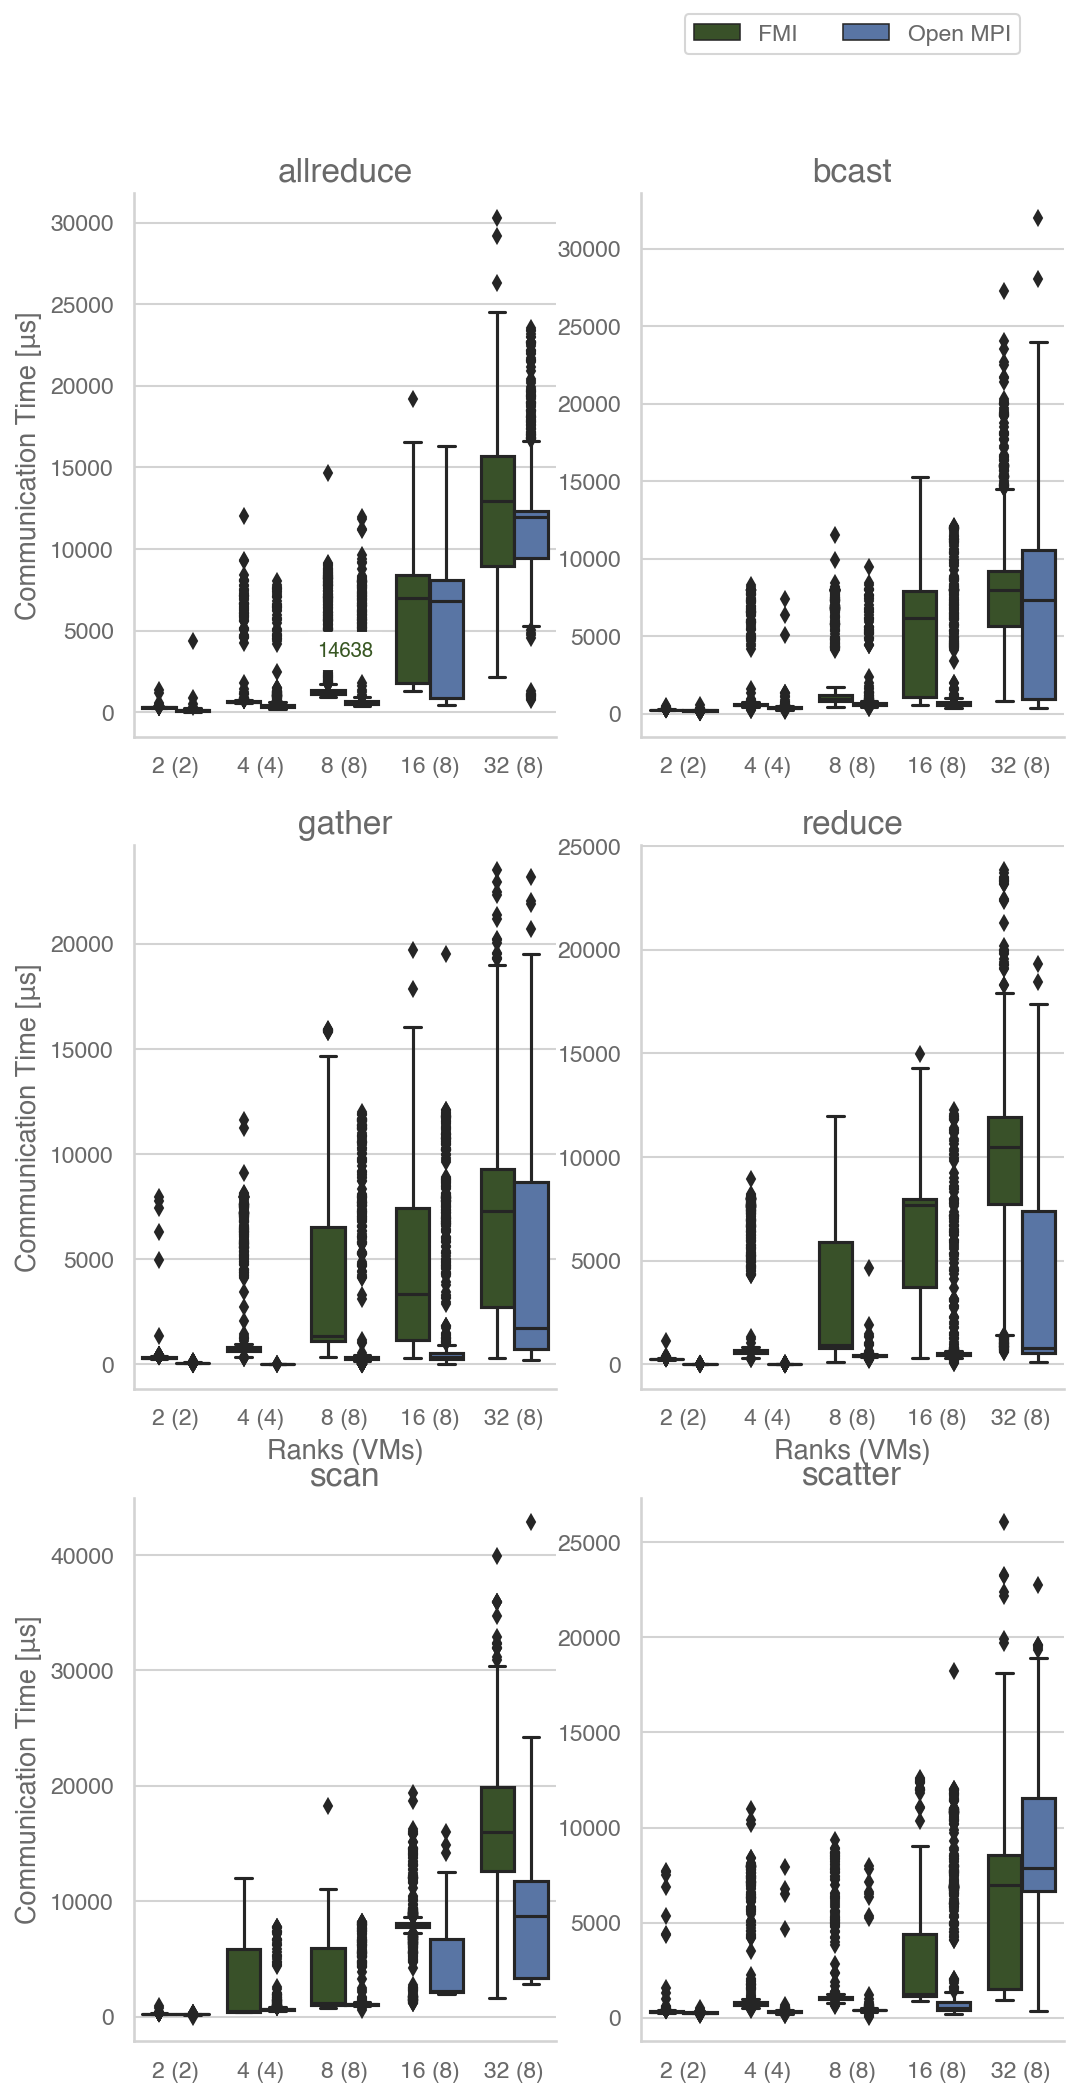

In [88]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 16))
my_pal = {"Open MPI": "b", "FMI": "#385723"}
#axs[0,0].set_ylim(0,4000)
axs[0,0].set_title("allreduce")
#axs[0,1].set_ylim(0,4000)
axs[0,1].set_title("bcast")
#axs[0,2].set_ylim(0,4000)
axs[1,0].set_title("gather")
#axs[1,0].set_ylim(0,4000)
axs[1,1].set_title("reduce")
#axs[1,1].set_ylim(0,4000)
axs[2,0].set_title("scan")
#axs[1,2].set_ylim(0,4000)
axs[2,1].set_title("scatter")

sns.boxplot(x="ranks", y="duration", hue="method",
            data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], palette=my_pal)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "bcast"], ax=axs[0, 1], palette=my_pal)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "gather"], ax=axs[1, 0],palette=my_pal)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "reduce"], ax=axs[1, 1], palette=my_pal)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scan"], ax=axs[2, 0], palette=my_pal)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scatter"], ax=axs[2, 1],  palette=my_pal)


#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], palette=my_pal, scale="width")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "bcast"], ax=axs[0, 1], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "gather"], ax=axs[0, 2], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "reduce"], ax=axs[1, 0], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "scan"], ax=axs[1, 1], cut=0, palette=my_pal, scale="count")
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "scatter"], ax=axs[1, 2], cut=0, palette=my_pal, scale="count")


for ix,iy in np.ndindex(axs.shape):
    axs[ix,iy].set_xticklabels(["2 (2)", "4 (4)", "8 (8)", "16 (8)", "32 (8)"])
    if ix == 0 and iy == 1:
        axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=2, fancybox=True)
    else:
        axs[ix,iy].legend([],[], frameon=False)
    if ix == 1:
        axs[ix,iy].set_xlabel("Ranks (VMs)")
    else:
        axs[ix,iy].set_xlabel(None)
    if iy == 0:
        axs[ix,iy].set_ylabel("Communication Time [μs]")
    else:
        axs[ix,iy].set_ylabel(None)

axs[0,0].text(2, 3750, va='center', ha='center', size='x-small',
              backgroundcolor="white", color=my_pal["FMI"],
              s=data.loc[(data['experiment'] == "allreduce") & (data["ranks"] == 8) & (data["method"] == "FMI")]["duration"].max())
#axs[0,0].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["allreduce"][(vals["allreduce"]["n"] == 16) & (vals["allreduce"]["method"] == "FMI")]["latency"].max())
#axs[0,0].text(4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["allreduce"][(vals["allreduce"]["n"] == 32) & (vals["allreduce"]["method"] == "FMI")]["latency"].max())

#axs[0,1].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["bcast"][(vals["bcast"]["n"] == 32) & (vals["bcast"]["method"] == "FMI")]["latency"].max())
#axs[0,1].text(2, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["bcast"][(vals["bcast"]["n"] == 8) & (vals["bcast"]["method"] == "Open MPI")]["latency"].max())
#axs[0,1].text(3.7, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["bcast"][(vals["bcast"]["n"] == 32) & (vals["bcast"]["method"] == "Open MPI")]["latency"].max())

#axs[0,2].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["gather"][(vals["gather"]["n"] == 16) & (vals["gather"]["method"] == "FMI")]["latency"].max())
#axs[0,2].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["gather"][(vals["gather"]["n"] == 32) & (vals["gather"]["method"] == "FMI")]["latency"].max())
#axs[0,2].text(3.7, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["gather"][(vals["gather"]["n"] == 32) & (vals["gather"]["method"] == "Open MPI")]["latency"].max())

#axs[1,0].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["reduce"][(vals["reduce"]["n"] == 16) & (vals["reduce"]["method"] == "Open MPI")]["latency"].max())
#axs[1,0].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["reduce"][(vals["reduce"]["n"] == 32) & (vals["reduce"]["method"] == "FMI")]["latency"].max())

#axs[1,1].text(2.7, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["scan"][(vals["scan"]["n"] == 16) & (vals["scan"]["method"] == "Open MPI")]["latency"].max())
#axs[1,1].text(3.6, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["Open MPI"], s=vals["scan"][(vals["scan"]["n"] == 32) & (vals["scan"]["method"] == "Open MPI")]["latency"].max())
#axs[1,1].text(2, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["scan"][(vals["scan"]["n"] == 8) & (vals["scan"]["method"] == "FMI")]["latency"].max())
#axs[1,1].text(4.4, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["scan"][(vals["scan"]["n"] == 32) & (vals["scan"]["method"] == "FMI")]["latency"].max())

#axs[1,2].text(3, 3750, va='center', ha='center', size='x-small', backgroundcolor="white", color=my_pal["FMI"], s=vals["scatter"][(vals["scatter"]["n"] == 16) & (vals["scatter"]["method"] == "FMI")]["latency"].max())

#fig.savefig(os.path.join(OUTPUT_PATH, "fmi_benchmark_mpi_new.pdf"), bbox_inches='tight')


## New data

In [122]:

BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DIRECT_BASE_PATH = os.path.join(BASE_PATH, 'fmi', 'out_tcp')
REDIS_BASE_BATH = os.path.join(BASE_PATH, 'fmi', 'out_redis')
S3_BASE_BATH = os.path.join(BASE_PATH, 'fmi', 'out_s3')
experiments = ['allreduce', 'bcast', 'gather', 'reduce', 'scan', 'scatter']

NUM_NODES = [2, 4, 8, 16, 32]


tcp_data = []
for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            for rep in range(30):
                mpi_path = os.path.join(DIRECT_BASE_PATH, f"{experiment}_{num_node}_{rank}_{rep+1}.json")
                #print(mpi_path)
                data = pd.read_csv(mpi_path, names=['peer', 'idx', 'start', 'end', 'duration', 'retries'])[1:]
                data['idx'] = rep
                data.reset_index(inplace=True)
                dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        #print(data)
        max_data = data.groupby(['idx'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        tcp_data.append(max_data)
        
tcp_data = pd.concat(tcp_data)
tcp_data["method"] = "Lambda Functions (FMI Direct)"

#ata = pd.concat([s3_data, redis_data, tcp_data])


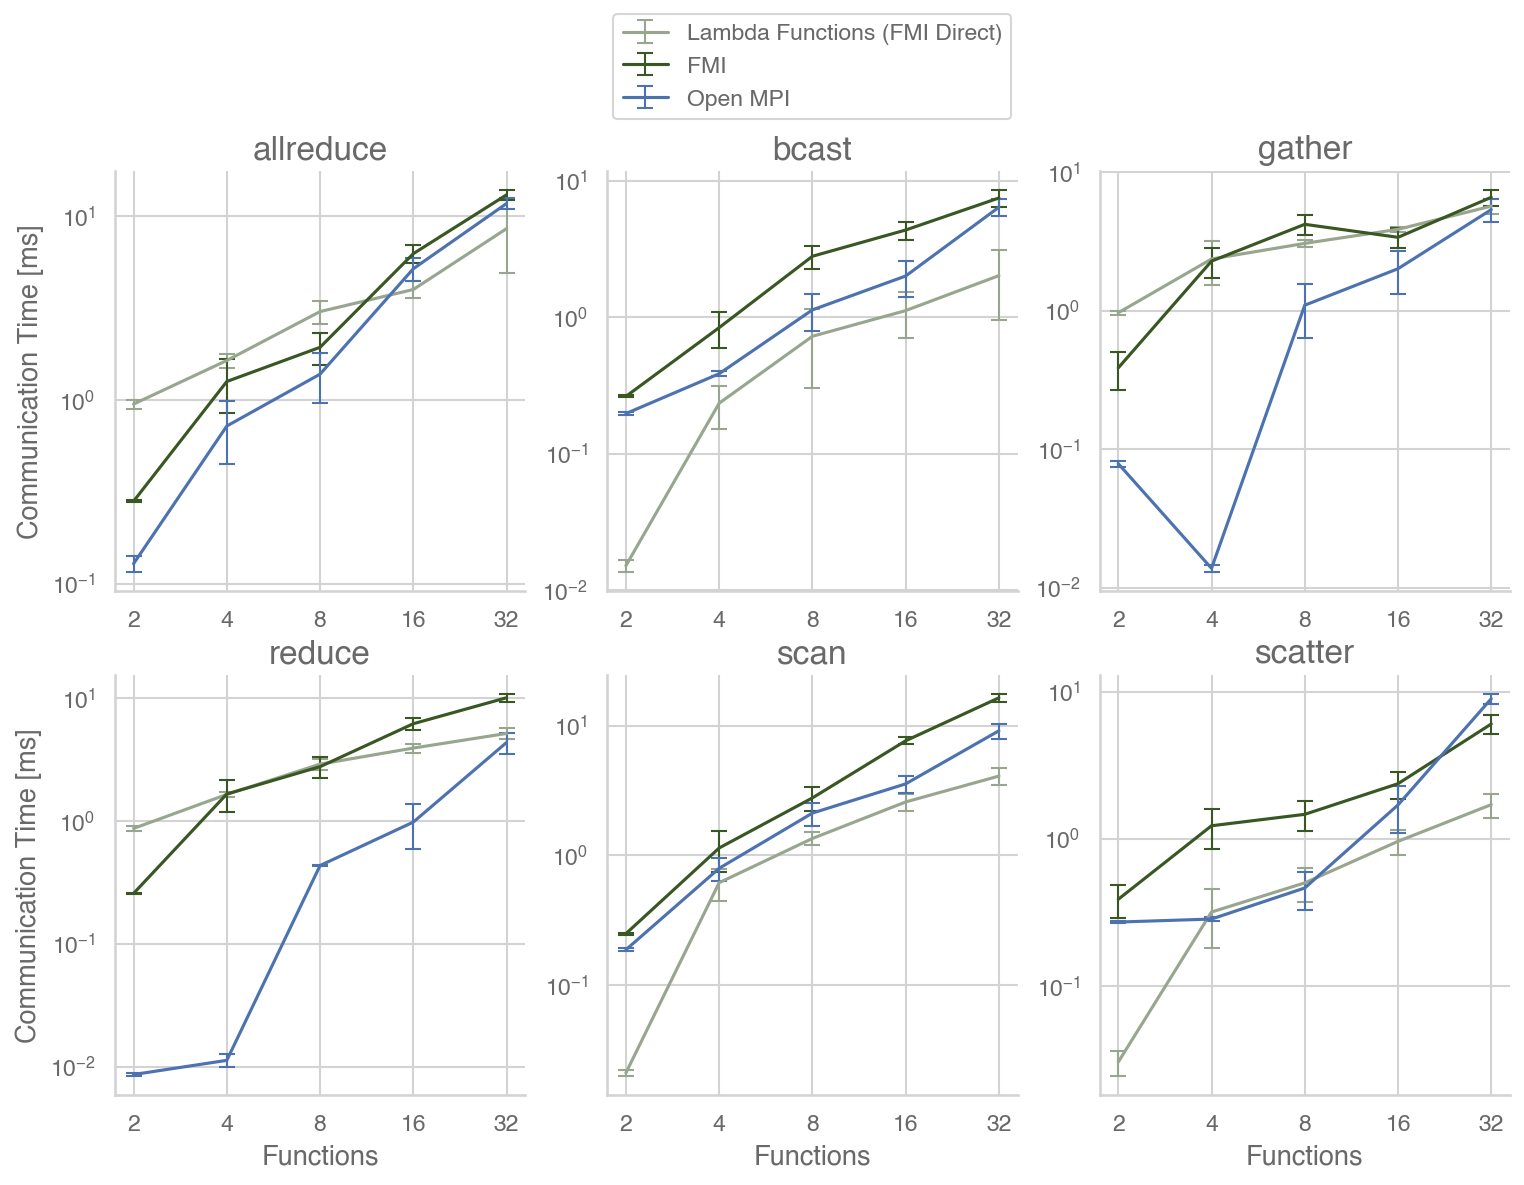

In [123]:
NUM_NODES = [2, 4, 8, 16, 32]
vals = {}
#for experiment in experiments:
#    vals[experiment] = pd.concat([mpi_bench[experiment][(mpi_bench[experiment]["method"] == "FMI") | (mpi_bench[experiment]["method"] == "Open MPI")], lambda_bench[experiment][lambda_bench[experiment]["method"] == "Direct"]])
#    vals[experiment]["method"] = vals[experiment]["method"].replace({"FMI": "EC2 VMs (FMI Direct)", "Open MPI": "EC2 VMs (Open MPI)", "Direct": "Lambda Functions (FMI Direct)"})
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#my_pal = {
#    "EC2 VMs (FMI Direct)": "#385723", 
#    "Lambda Functions (FMI Direct)": "#98a68f", 
#    "EC2 VMs (Open MPI)": "b"
#}
my_pal = {
    "FMI": "#385723", 
    "Lambda Functions (FMI Direct)": "#98a68f", 
    "Open MPI": "b"
}

full_data = pd.concat([mpi_data, tcp_data])

#for method in ["EC2 VMs (FMI Direct)", "Lambda Functions (FMI Direct)", "EC2 VMs (Open MPI)"]:
for method in ["Lambda Functions (FMI Direct)", "FMI", "Open MPI"]:
    ix, iy = 0, 0
    for experiment in experiments:
        plot_data = {}
        error = []
        preds = {}
        for num_node in NUM_NODES:
            experiment_sizes = {
                "allreduce": 4,
                "bcast": 4,
                "gather": 4992 / num_node,
                "reduce": 4,
                "scan": 4,
                "scatter": 4992 / num_node
            }
            #values = vals[experiment].loc[(vals[experiment]['n'] == num_node) & (vals[experiment]['method'] == method)]['latency']
            values = full_data.loc[
                (full_data['experiment'] == experiment) & (full_data['ranks'] == num_node)
                & (full_data['method'] == method)
            ]['duration']
            mean = np.mean(values)
            #mean = np.median(values)
            ci = scipy.stats.sem(values) * scipy.stats.t.ppf((1 + 0.95) / 2., len(values) - 1)
            plot_data[num_node] = mean / 1000
            #print(mean, ci)
            error.append(ci / 1000)
            
            
        axs[ix,iy].errorbar(plot_data.keys(), plot_data.values(), error, elinewidth=1, capsize=4, label=method, c=my_pal[method])
        axs[ix,iy].set_title(experiment)
        axs[ix,iy].set_yscale('log')
        axs[ix,iy].set_xscale('log')
        axs[ix,iy].set_xticks(NUM_NODES)
        axs[ix,iy].set_xticklabels(NUM_NODES)
        if ix == 0 and iy == 1:
            axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), fancybox=True)
        else:
            axs[ix,iy].legend([],[], frameon=False)
        if ix == 1:
            axs[ix,iy].set_xlabel("Functions")
        else:
            axs[ix,iy].set_xlabel(None)
        if iy == 0:
            axs[ix,iy].set_ylabel("Communication Time [ms]")
        else:
            axs[ix,iy].set_ylabel(None)
        iy += 1
        if iy > 2:
            iy = 0
            ix = 1
#fig.savefig(os.path.join(OUTPUT_PATH, "fmi_mpi_lambda_benchmark_comparison.pdf"), bbox_inches='tight')

## New new data

In [179]:

BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
MPI_BASE_BATH = os.path.join(BASE_PATH, 'mpi', 'results_spread')
SMI_BASE_BATH = os.path.join(BASE_PATH, 'fmi_vms', 'results_spread')
NUM_NODES = [2, 4, 8, 16, 32]
experiments = ['allreduce', 'bcast', 'gather', 'reduce', 'scan', 'scatter']
mpi_data = []

for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            mpi_path = os.path.join(MPI_BASE_BATH, f"{experiment}_{num_node}_{rank}.out")
            
            data = pd.read_csv(mpi_path, names=['start', 'end', 'duration'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['index'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        mpi_data.append(max_data)
        
mpi_data = pd.concat(mpi_data)
mpi_data["method"] = "Open MPI"

fmi_data = []

for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            fmi_path = os.path.join(SMI_BASE_BATH, f"{experiment}_{num_node}_{rank}.out")
            
            data = pd.read_csv(fmi_path, names=['start', 'end', 'duration'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['index'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        ##print(max_data)
        #print(max_data.min())
        #print(max_data.mean())
        #print(max_data.median())
        #print(max_data.quantile(.95))
        #print(max_data.quantile(.99))
        #print(max_data.max())
        fmi_data.append(max_data)
        
fmi_data = pd.concat(fmi_data)
fmi_data["method"] = "FMI"
mpi_data = pd.concat([fmi_data, mpi_data])
data = mpi_data

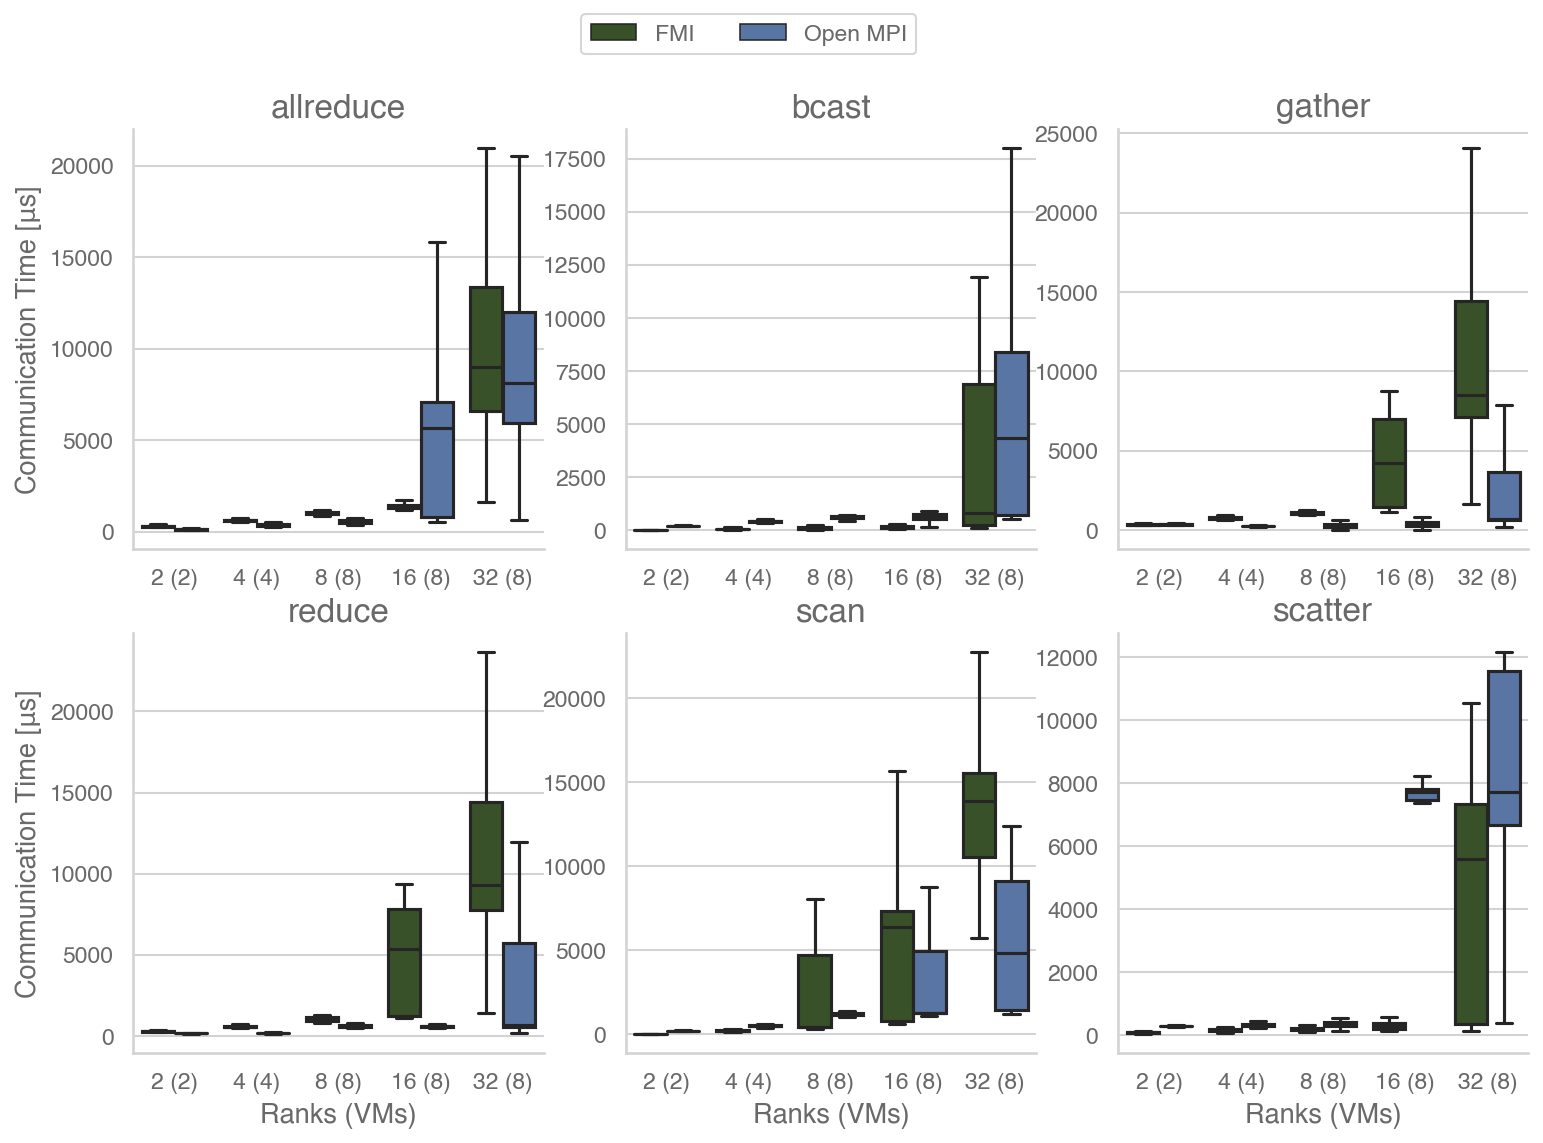

In [180]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
my_pal = {"Open MPI": "b", "FMI": "#385723"}
#axs[0,0].set_ylim(0,4000)
axs[0,0].set_title("allreduce")
#axs[0,1].set_ylim(0,4000)
axs[0,1].set_title("bcast")
#axs[0,2].set_ylim(0,4000)
axs[0,2].set_title("gather")
#axs[1,0].set_ylim(0,4000)
axs[1,0].set_title("reduce")
#axs[1,1].set_ylim(0,4000)
axs[1,1].set_title("scan")
#axs[1,2].set_ylim(0,4000)
axs[1,2].set_title("scatter")

sns.boxplot(x="ranks", y="duration", hue="method",
            data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], palette=my_pal,showfliers=False)
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], cut=0,palette=my_pal, scale="count")
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "bcast"], ax=axs[0, 1], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "gather"], ax=axs[0, 2],palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "reduce"], ax=axs[1, 0], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scan"], ax=axs[1, 1], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scatter"], ax=axs[1, 2],  palette=my_pal,showfliers=False)


for ix,iy in np.ndindex(axs.shape):
    axs[ix,iy].set_xticklabels(["2 (2)", "4 (4)", "8 (8)", "16 (8)", "32 (8)"])
    if ix == 0 and iy == 1:
        axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.3, 1.3), ncol=2, fancybox=True)
    else:
        axs[ix,iy].legend([],[], frameon=False)
    if ix == 1:
        axs[ix,iy].set_xlabel("Ranks (VMs)")
    else:
        axs[ix,iy].set_xlabel(None)
    if iy == 0:
        axs[ix,iy].set_ylabel("Communication Time [μs]")
    else:
        axs[ix,iy].set_ylabel(None)

axs[0,0].text(2, 3750, va='center', ha='center', size='x-small',
      backgroundcolor="white", color=my_pal["FMI"],
      s=data.loc[(data['experiment'] == "allreduce") & (data["ranks"] == 8) & (data["method"] == "FMI")]["duration"].median())


'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


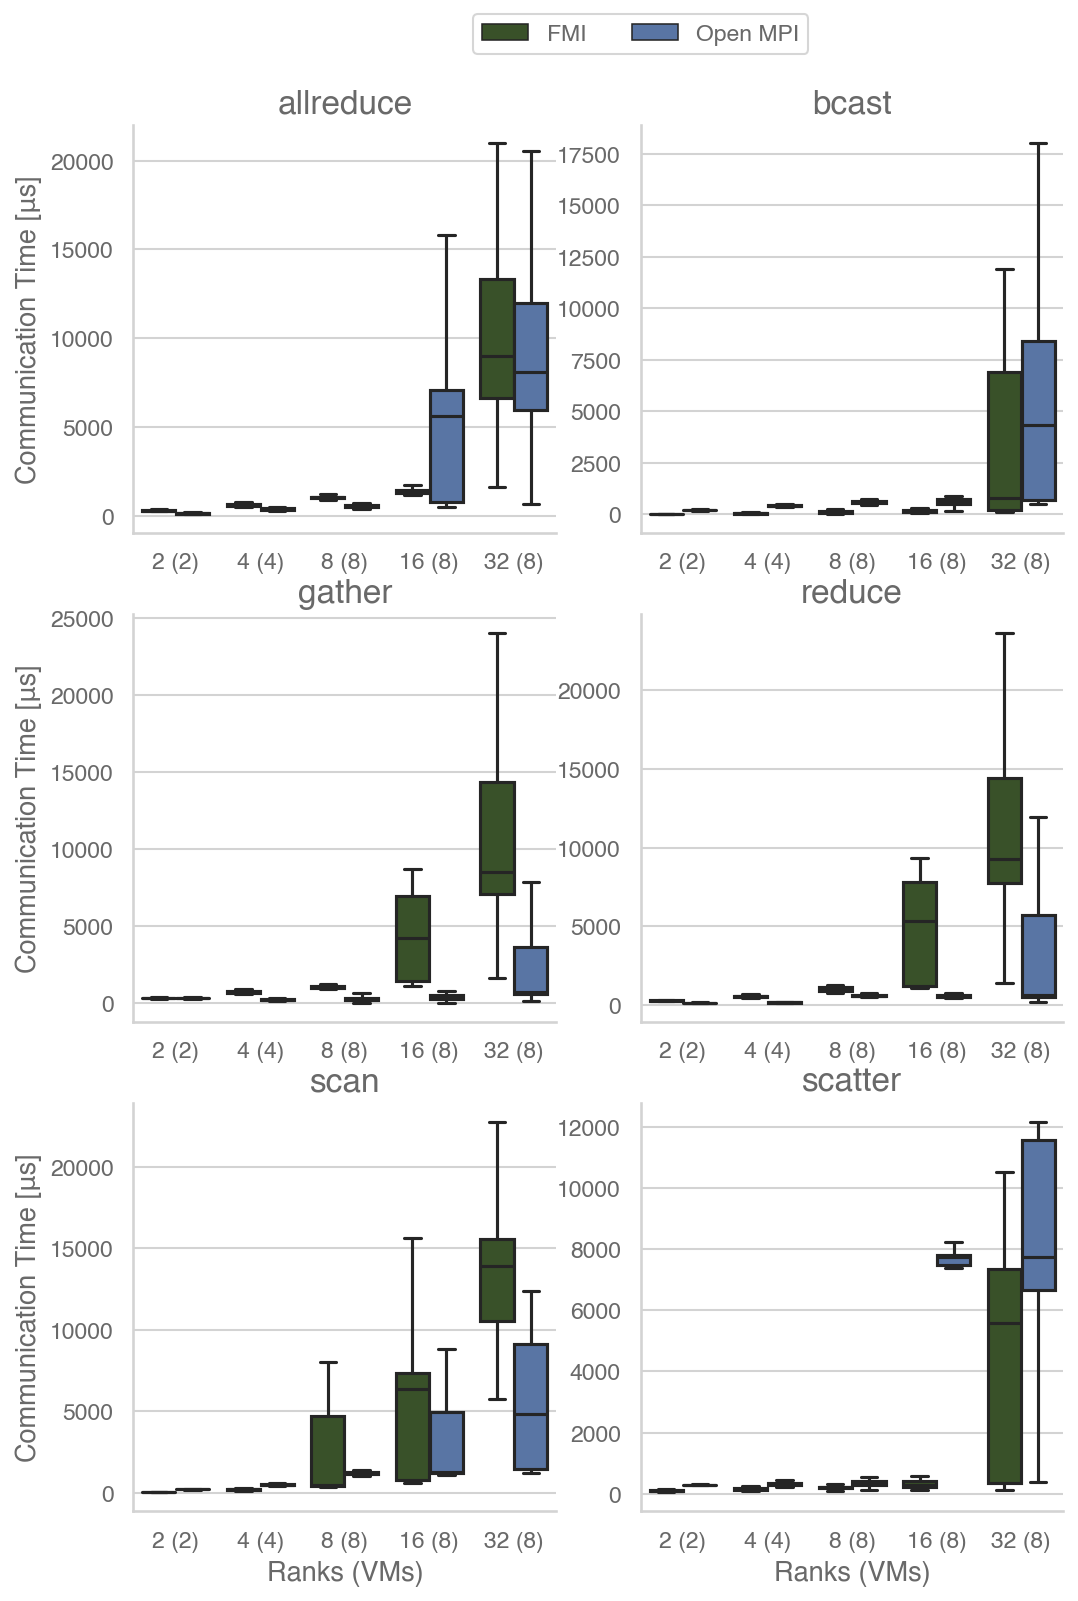

In [206]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
my_pal = {"Open MPI": "b", "FMI": "#385723"}
#axs[0,0].set_ylim(0,4000)
axs[0,0].set_title("allreduce")
#axs[0,1].set_ylim(0,4000)
axs[0,1].set_title("bcast")
#axs[0,2].set_ylim(0,4000)
axs[1,0].set_title("gather")
#axs[1,0].set_ylim(0,4000)
axs[1,1].set_title("reduce")
#axs[1,1].set_ylim(0,4000)
axs[2,0].set_title("scan")
#axs[1,2].set_ylim(0,4000)
axs[2,1].set_title("scatter")

sns.boxplot(x="ranks", y="duration", hue="method",
            data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], palette=my_pal,showfliers=False)
#sns.violinplot(x="ranks", y="duration", hue="method",
#               data=data.loc[data['experiment'] == "allreduce"], ax=axs[0, 0], cut=0,palette=my_pal, scale="count")
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "bcast"], ax=axs[0, 1], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "gather"], ax=axs[1, 0],palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "reduce"], ax=axs[1, 1], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scan"], ax=axs[2, 0], palette=my_pal,showfliers=False)
sns.boxplot(x="ranks", y="duration", hue="method",
               data=data.loc[data['experiment'] == "scatter"], ax=axs[2, 1],  palette=my_pal,showfliers=False)


for ix,iy in np.ndindex(axs.shape):
    axs[ix,iy].set_xticklabels(["2 (2)", "4 (4)", "8 (8)", "16 (8)", "32 (8)"])
    if ix == 0 and iy == 1:
        axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0, 1.3), ncol=2, fancybox=True)
    else:
        axs[ix,iy].legend([],[], frameon=False)
    if ix == 2:
        axs[ix,iy].set_xlabel("Ranks (VMs)")
    else:
        axs[ix,iy].set_xlabel(None)
    if iy == 0:
        axs[ix,iy].set_ylabel("Communication Time [μs]")
    else:
        axs[ix,iy].set_ylabel(None)


fig.savefig(os.path.join(OUTPUT_PATH, "fmi_mpi_comparison.pdf"), bbox_inches='tight')

In [207]:
MPI_BASE_BATH = os.path.join(BASE_PATH, 'mpi', 'results_colocated')
SMI_BASE_BATH = os.path.join(BASE_PATH, 'fmi_vms', 'results_colocated')
NUM_NODES = [2, 4, 8, 16, 32]
experiments = ['allreduce', 'bcast', 'gather', 'reduce', 'scan', 'scatter']
mpi_data = []

for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            mpi_path = os.path.join(MPI_BASE_BATH, f"{experiment}_{num_node}_{rank}.out")
            
            data = pd.read_csv(mpi_path, names=['start', 'end', 'duration'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['index'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        mpi_data.append(max_data)
        
mpi_data = pd.concat(mpi_data)
mpi_data["method"] = "Open MPI (EC2 VMs)"

fmi_data = []

for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            fmi_path = os.path.join(SMI_BASE_BATH, f"{experiment}_{num_node}_{rank}.out")
            
            data = pd.read_csv(fmi_path, names=['start', 'end', 'duration'])[1:101]
            data.reset_index(inplace=True)
            dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        max_data = data.groupby(['index'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        ##print(max_data)
        #print(max_data.min())
        #print(max_data.mean())
        #print(max_data.median())
        #print(max_data.quantile(.95))
        #print(max_data.quantile(.99))
        #print(max_data.max())
        fmi_data.append(max_data)
        
fmi_data = pd.concat(fmi_data)
fmi_data["method"] = "FMI (EC2 VMs)"
mpi_data = pd.concat([fmi_data, mpi_data])
data = mpi_data

In [208]:

BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DIRECT_BASE_PATH = os.path.join(BASE_PATH, 'fmi', 'out_tcp')
REDIS_BASE_BATH = os.path.join(BASE_PATH, 'fmi', 'out_redis')
S3_BASE_BATH = os.path.join(BASE_PATH, 'fmi', 'out_s3')
experiments = ['allreduce', 'bcast', 'gather', 'reduce', 'scan', 'scatter']

NUM_NODES = [2, 4, 8, 16, 32]


tcp_data = []
for experiment in experiments:
    for num_node in NUM_NODES:
        
        dfs = []
        for rank in range(num_node):
                          
            for rep in range(30):
                mpi_path = os.path.join(DIRECT_BASE_PATH, f"{experiment}_{num_node}_{rank}_{rep+1}.json")
                #print(mpi_path)
                data = pd.read_csv(mpi_path, names=['peer', 'idx', 'start', 'end', 'duration', 'retries'])[1:]
                data['idx'] = rep
                data.reset_index(inplace=True)
                dfs.append(data)
            #data['size'] = num_node
            #data['ranks'] = num_node
            #data['experiment'] = experiment
            #print(data)
        data = pd.concat(dfs)
        #print(data)
        #print(data)
        max_data = data.groupby(['idx'])['duration'].max().reset_index()
        max_data['ranks'] = num_node
        max_data['experiment'] = experiment
        #print(max_data)
        tcp_data.append(max_data)
        
tcp_data = pd.concat(tcp_data)
tcp_data["method"] = "FMI (Lambda Functions)"

#ata = pd.concat([s3_data, redis_data, tcp_data])


'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


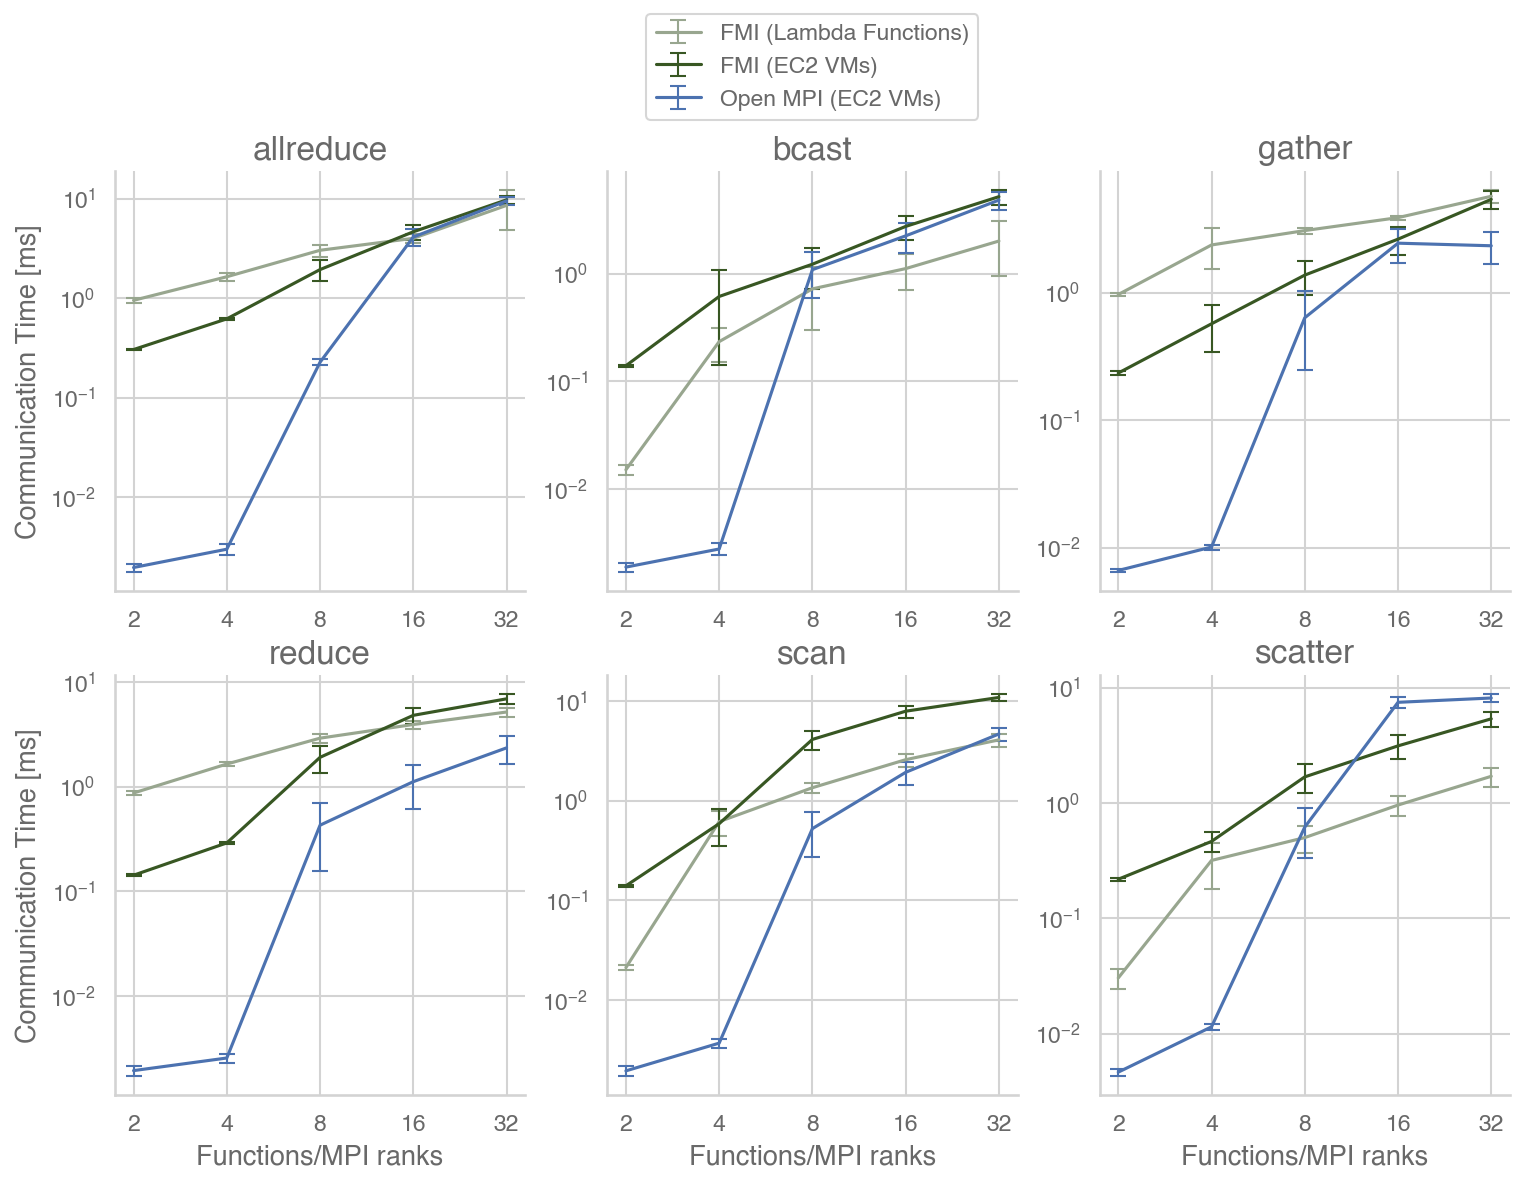

In [209]:
NUM_NODES = [2, 4, 8, 16, 32]
vals = {}
#for experiment in experiments:
#    vals[experiment] = pd.concat([mpi_bench[experiment][(mpi_bench[experiment]["method"] == "FMI") | (mpi_bench[experiment]["method"] == "Open MPI")], lambda_bench[experiment][lambda_bench[experiment]["method"] == "Direct"]])
#    vals[experiment]["method"] = vals[experiment]["method"].replace({"FMI": "EC2 VMs (FMI Direct)", "Open MPI": "EC2 VMs (Open MPI)", "Direct": "Lambda Functions (FMI Direct)"})
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
#my_pal = {
#    "EC2 VMs (FMI Direct)": "#385723", 
#    "Lambda Functions (FMI Direct)": "#98a68f", 
#    "EC2 VMs (Open MPI)": "b"
#}
my_pal = {
    "FMI (EC2 VMs)": "#385723", 
    "FMI (Lambda Functions)": "#98a68f", 
    "Open MPI (EC2 VMs)": "b"
}

full_data = pd.concat([mpi_data, tcp_data])

#for method in ["EC2 VMs (FMI Direct)", "Lambda Functions (FMI Direct)", "EC2 VMs (Open MPI)"]:
for method in ["FMI (Lambda Functions)", "FMI (EC2 VMs)", "Open MPI (EC2 VMs)"]:
    ix, iy = 0, 0
    for experiment in experiments:
        plot_data = {}
        error = []
        preds = {}
        for num_node in NUM_NODES:
            experiment_sizes = {
                "allreduce": 4,
                "bcast": 4,
                "gather": 4992 / num_node,
                "reduce": 4,
                "scan": 4,
                "scatter": 4992 / num_node
            }
            #values = vals[experiment].loc[(vals[experiment]['n'] == num_node) & (vals[experiment]['method'] == method)]['latency']
            values = full_data.loc[
                (full_data['experiment'] == experiment) & (full_data['ranks'] == num_node)
                & (full_data['method'] == method)
            ]['duration']
            mean = np.mean(values)
            #mean = np.median(values)
            ci = scipy.stats.sem(values) * scipy.stats.t.ppf((1 + 0.95) / 2., len(values) - 1)
            plot_data[num_node] = mean / 1000
            #print(mean, ci)
            error.append(ci / 1000)
            
            
        axs[ix,iy].errorbar(plot_data.keys(), plot_data.values(), error, elinewidth=1, capsize=4, label=method, c=my_pal[method])
        axs[ix,iy].set_title(experiment)
        axs[ix,iy].set_yscale('log')
        axs[ix,iy].set_xscale('log')
        axs[ix,iy].set_xticks(NUM_NODES)
        axs[ix,iy].set_xticklabels(NUM_NODES)
        if ix == 0 and iy == 1:
            axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), fancybox=True)
        else:
            axs[ix,iy].legend([],[], frameon=False)
        if ix == 1:
            axs[ix,iy].set_xlabel("Functions/MPI ranks")
        else:
            axs[ix,iy].set_xlabel(None)
        if iy == 0:
            axs[ix,iy].set_ylabel("Communication Time [ms]")
        else:
            axs[ix,iy].set_ylabel(None)
        iy += 1
        if iy > 2:
            iy = 0
            ix = 1
fig.savefig(os.path.join(OUTPUT_PATH, "fmi_mpi_lambda_benchmark_comparison.pdf"), bbox_inches='tight')

'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


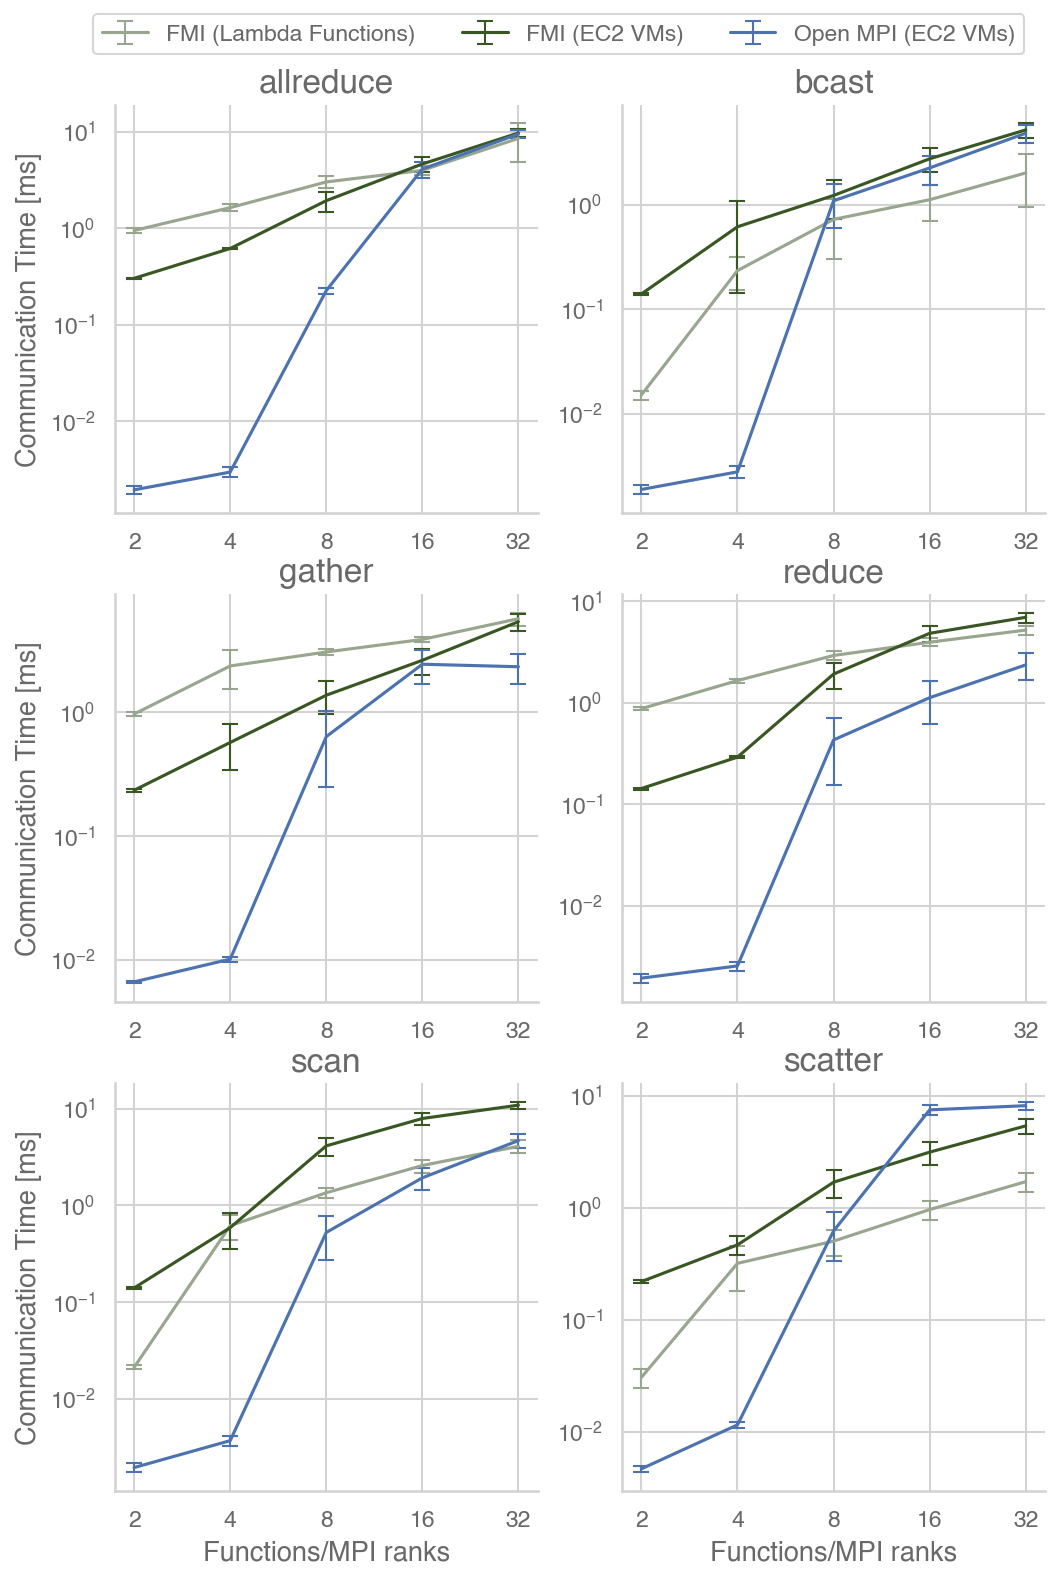

In [213]:
NUM_NODES = [2, 4, 8, 16, 32]
vals = {}
#for experiment in experiments:
#    vals[experiment] = pd.concat([mpi_bench[experiment][(mpi_bench[experiment]["method"] == "FMI") | (mpi_bench[experiment]["method"] == "Open MPI")], lambda_bench[experiment][lambda_bench[experiment]["method"] == "Direct"]])
#    vals[experiment]["method"] = vals[experiment]["method"].replace({"FMI": "EC2 VMs (FMI Direct)", "Open MPI": "EC2 VMs (Open MPI)", "Direct": "Lambda Functions (FMI Direct)"})
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
#my_pal = {
#    "EC2 VMs (FMI Direct)": "#385723", 
#    "Lambda Functions (FMI Direct)": "#98a68f", 
#    "EC2 VMs (Open MPI)": "b"
#}
my_pal = {
    "FMI (EC2 VMs)": "#385723", 
    "FMI (Lambda Functions)": "#98a68f", 
    "Open MPI (EC2 VMs)": "b"
}

full_data = pd.concat([mpi_data, tcp_data])

#for method in ["EC2 VMs (FMI Direct)", "Lambda Functions (FMI Direct)", "EC2 VMs (Open MPI)"]:
for method in ["FMI (Lambda Functions)", "FMI (EC2 VMs)", "Open MPI (EC2 VMs)"]:
    ix, iy = 0, 0
    for experiment in experiments:
        plot_data = {}
        error = []
        preds = {}
        for num_node in NUM_NODES:
            experiment_sizes = {
                "allreduce": 4,
                "bcast": 4,
                "gather": 4992 / num_node,
                "reduce": 4,
                "scan": 4,
                "scatter": 4992 / num_node
            }
            #values = vals[experiment].loc[(vals[experiment]['n'] == num_node) & (vals[experiment]['method'] == method)]['latency']
            values = full_data.loc[
                (full_data['experiment'] == experiment) & (full_data['ranks'] == num_node)
                & (full_data['method'] == method)
            ]['duration']
            mean = np.mean(values)
            ci = scipy.stats.sem(values) * scipy.stats.t.ppf((1 + 0.95) / 2., len(values) - 1)
            plot_data[num_node] = mean / 1000
            #print(mean, ci)
            error.append(ci / 1000)
            
            
        axs[ix,iy].errorbar(plot_data.keys(), plot_data.values(), error, elinewidth=1, capsize=4, label=method, c=my_pal[method])
        axs[ix,iy].set_title(experiment)
        axs[ix,iy].set_yscale('log')
        axs[ix,iy].set_xscale('log')
        axs[ix,iy].set_xticks(NUM_NODES)
        axs[ix,iy].set_xticklabels(NUM_NODES)
        if ix == 0 and iy == 1:
            axs[ix,iy].legend(loc='upper center', bbox_to_anchor=(-0.15, 1.25), ncol=3, fancybox=True)
        else:
            axs[ix,iy].legend([],[], frameon=False)
        if ix == 2:
            axs[ix,iy].set_xlabel("Functions/MPI ranks")
        else:
            axs[ix,iy].set_xlabel(None)
        if iy == 0:
            axs[ix,iy].set_ylabel("Communication Time [ms]")
        else:
            axs[ix,iy].set_ylabel(None)
        iy += 1
        if iy > 1:
            iy = 0
            ix += 1
fig.savefig(os.path.join(OUTPUT_PATH, "fmi_mpi_lambda_benchmark_comparison_3x2.pdf"), bbox_inches='tight')